In [1]:
# read hparams from event file
from tbparse import SummaryReader

reader = SummaryReader(log_path='runs/0425-1505/modular-97-97')

In [1]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import torch
import glob
import os
import matplotlib.pyplot as plt
from plot import make_path

root = "/home/kitouni/projects/Grok/grokking-squared/runs/"
name = "0426-1018/modular-97-97" # 1e-5 decoder learning rate
directory = os.path.join(root, name)
files = glob.glob(os.path.join(directory, "weights/*"))
files = sorted(files, key=lambda x: int(os.path.basename(x).split(".")[0]))

In [2]:
files = sorted(files, key=lambda x: int(os.path.basename(x).split(".")[0]))
embeddings = torch.load(files[-1]).cpu().numpy()

/home/kitouni/miniconda3/envs/main/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kitouni/miniconda3/envs/main/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


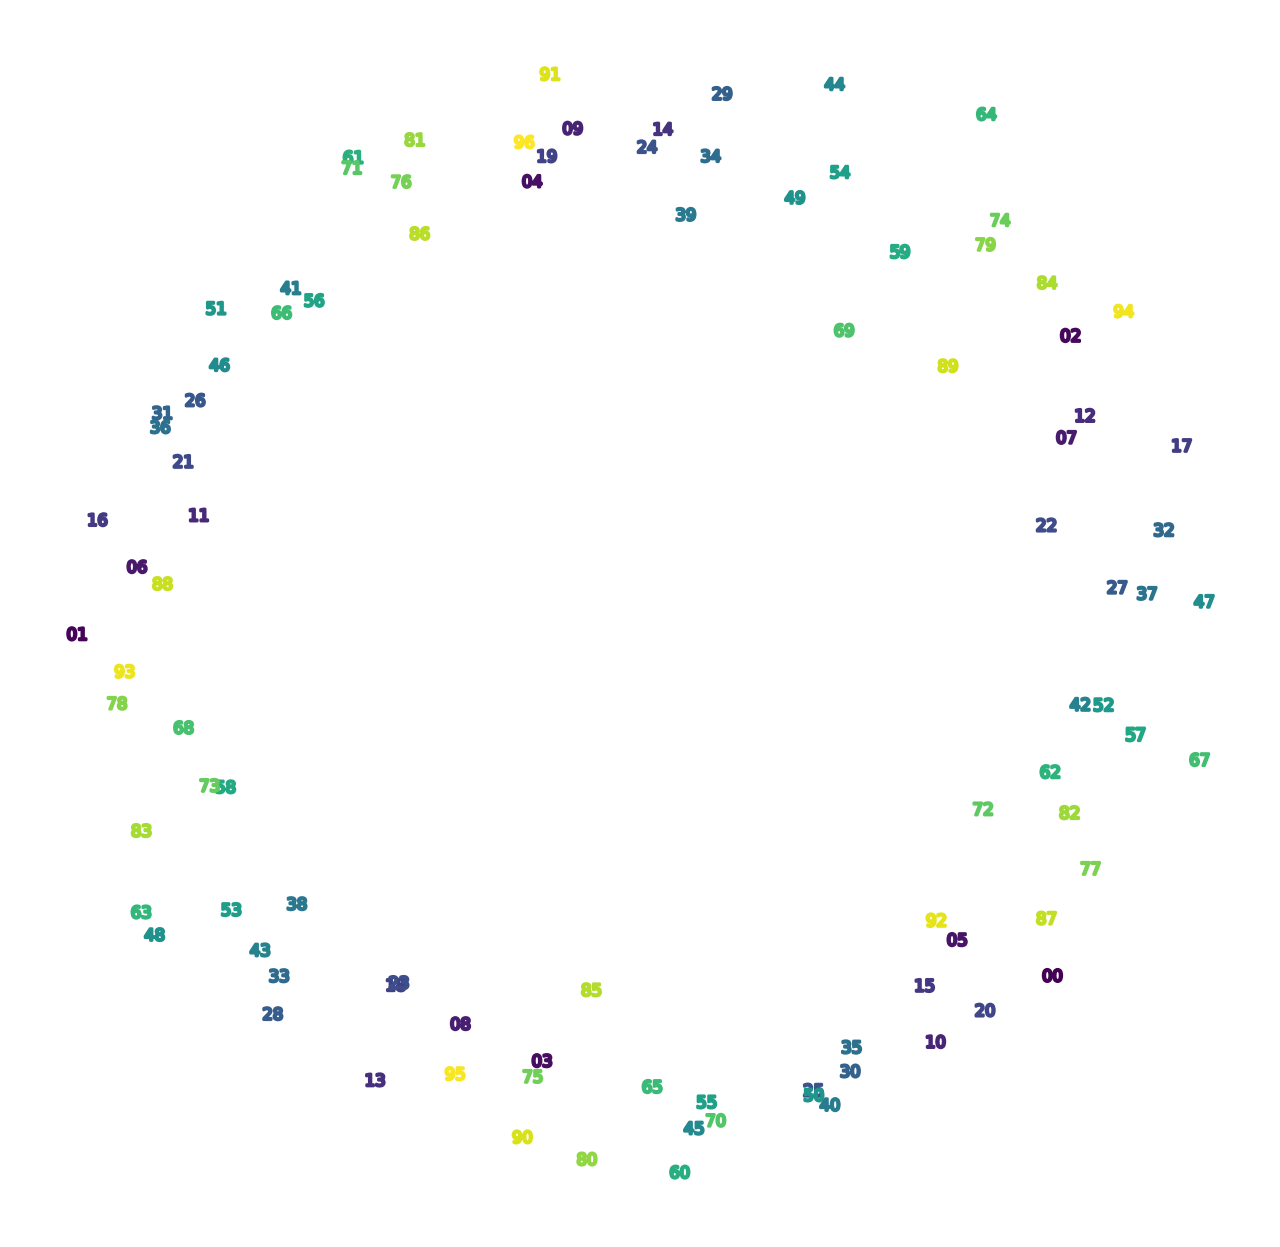

In [5]:
pca = PCA()
embeddings_pca = pca.fit_transform(embeddings)
tsne = TSNE(n_components=2, perplexity=40)
embeddings_tsne = tsne.fit_transform(embeddings_pca)

cmap = plt.get_cmap('viridis')
fig = plt.figure(dpi=200, figsize=(8, 8))
# ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot()
ax.set_axis_off()
sc = ax.scatter(*embeddings_pca[:, :2].T, s=50, cmap=cmap, c=range(embeddings_pca.shape[0]))
sc.set_paths([make_path(f"${m:02d}$") for m in range(len(embeddings))])